### Importing Required Libraries
This cell imports necessary libraries for data processing and analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset
This cell loads data from a CSV file using pandas.

In [5]:
data = pd.read_csv(r"C:\Users\mahmo\Downloads\final_internship_data.csv")

### Code Execution
A sample of the dataset

In [29]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


### Code Execution
Info of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

### Data Cleaning
Turns out that that there are a missing values

In [7]:
print(data.isnull().sum())

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


### Data Cleaning
Drop duplicates

In [8]:
data = data.drop_duplicates()

### Handling Missing Data
This cell removes rows with missing values to clean the dataset.

In [ ]:
data = data.dropna()

### Data Cleaning
Convert pickup_datetime to DateTime

In [10]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

### Data Visualization
Univariate Analysis Numerical Columns:

Analyze the distribution of numerical columns like fare_amount, passenger_count, distance, etc.

Use histograms, box plots, and summary statistics (mean, median, standard deviation).

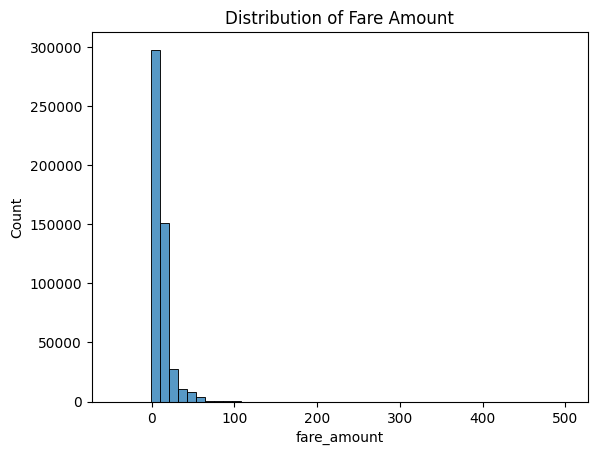

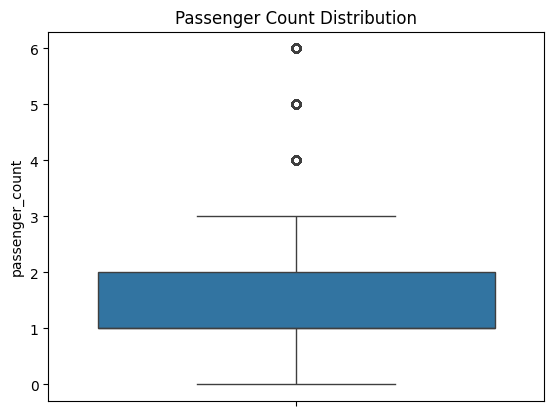

In [11]:
# Histogram of fare_amount
sns.histplot(data['fare_amount'], bins=50)
plt.title('Distribution of Fare Amount')
plt.show()

# Box plot of passenger_count
sns.boxplot(data['passenger_count'])
plt.title('Passenger Count Distribution')
plt.show()

### Data Visualization
Univariate Analysis Categorical Columns:

Analyze the distribution of categorical columns like Car Condition, Weather, Traffic Condition.

Use bar charts to visualize the frequency of each category.

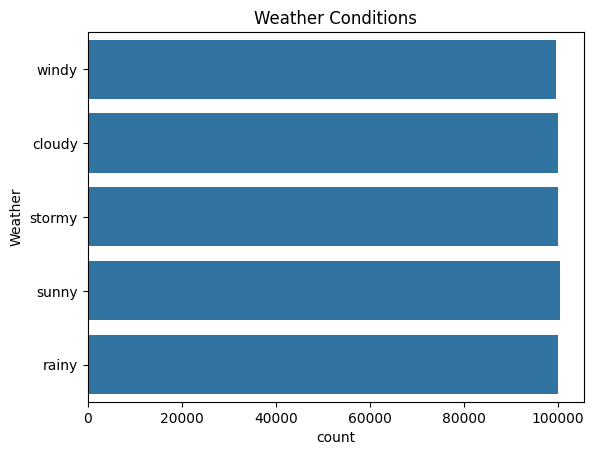

In [12]:
sns.countplot(data['Weather'])
plt.title('Weather Conditions')
plt.show()

###  Bivariate Analysis
Fare Amount vs. Distance:

Analyze the relationship between fare_amount and distance.

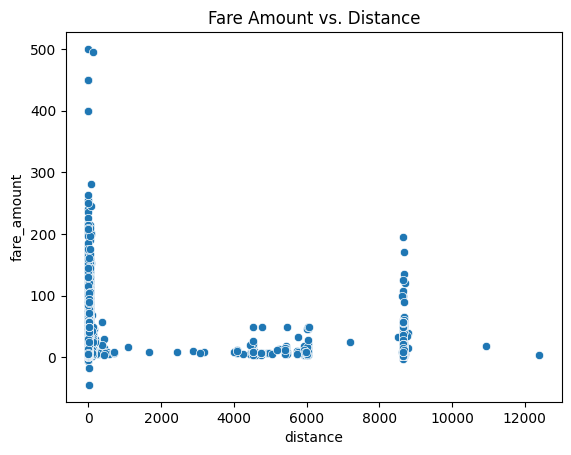

In [13]:
sns.scatterplot(x='distance', y='fare_amount', data=data)
plt.title('Fare Amount vs. Distance')
plt.show()

### Fare Amount vs. Passenger Count:

Analyze how the fare amount varies with the number of passengers.

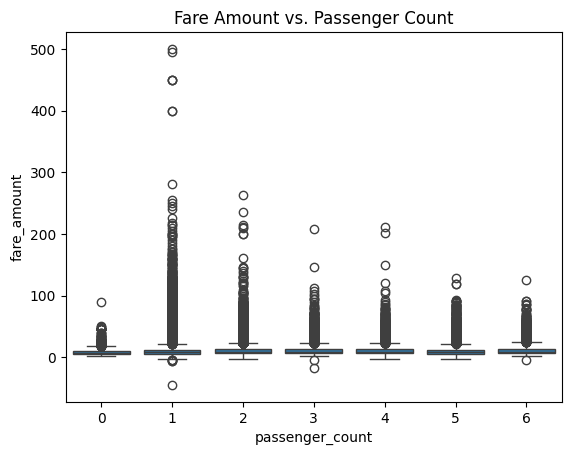

In [14]:
sns.boxplot(x='passenger_count', y='fare_amount', data=data)
plt.title('Fare Amount vs. Passenger Count')
plt.show()

### Fare Amount vs. Weather:

Analyze how the fare amount varies with weather conditions.

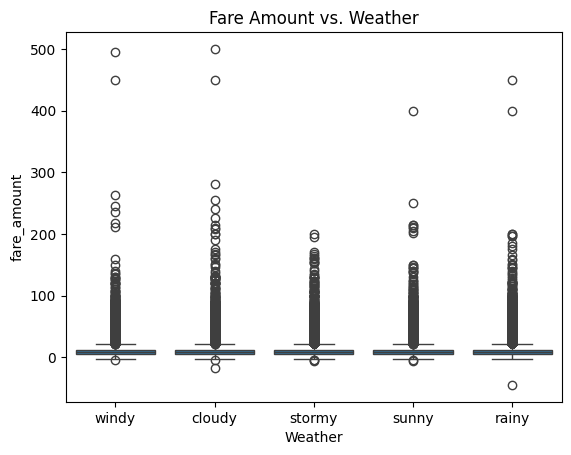

In [15]:
sns.boxplot(x='Weather', y='fare_amount', data=data)
plt.title('Fare Amount vs. Weather')
plt.show()

### Multivariate Analysis
Correlation Matrix:

Analyze the correlation between numerical columns.

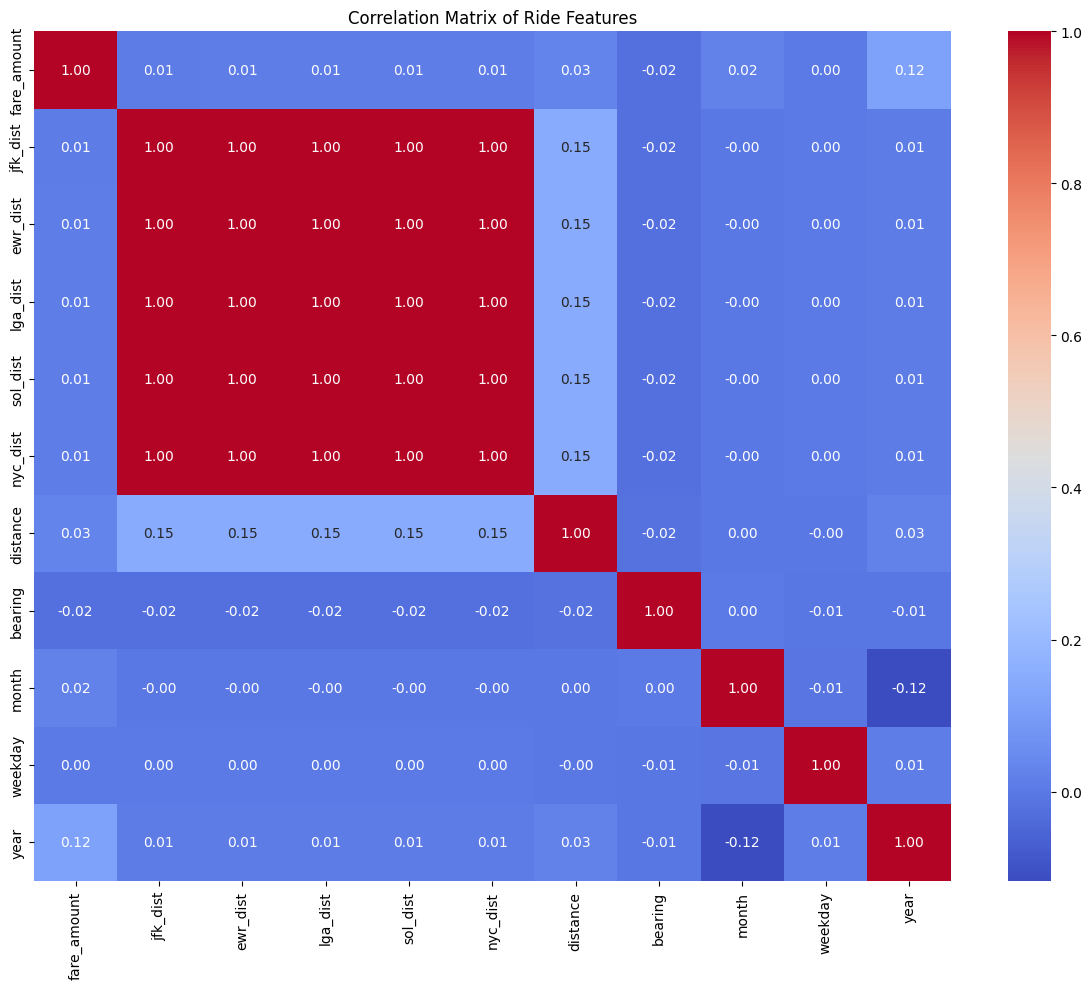

In [28]:
# List of numeric columns to analyze
numeric_columns = [
    'fare_amount',
    'jfk_dist',
    'ewr_dist',
    'lga_dist',
    'sol_dist',
    'nyc_dist',
    'distance',
    'bearing',
    'month',
    'weekday',
    'year'
]

# Create numeric dataframe
numeric_data = data[numeric_columns]

# Create correlation matrix
corr = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Ride Features')
plt.tight_layout()
plt.show()

### Fare Amount vs. Distance and Weather:

Analyze how fare amount varies with distance and weather conditions.

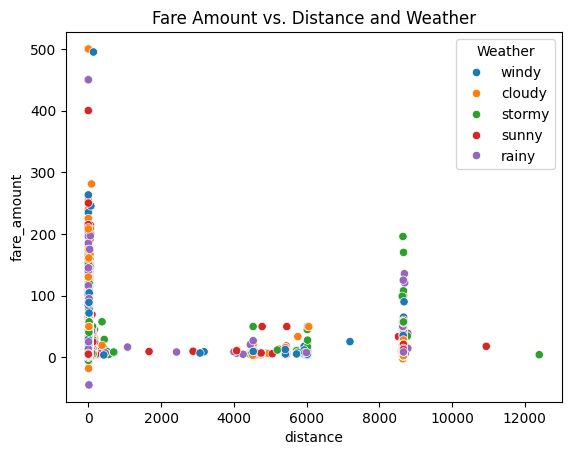

In [30]:
sns.scatterplot(x='distance', y='fare_amount', hue='Weather', data=data)
plt.title('Fare Amount vs. Distance and Weather')
plt.show()

### Time-Based Analysis
Fare Amount Over Time:

Analyze how the fare amount varies over time (hour, day, month, year).

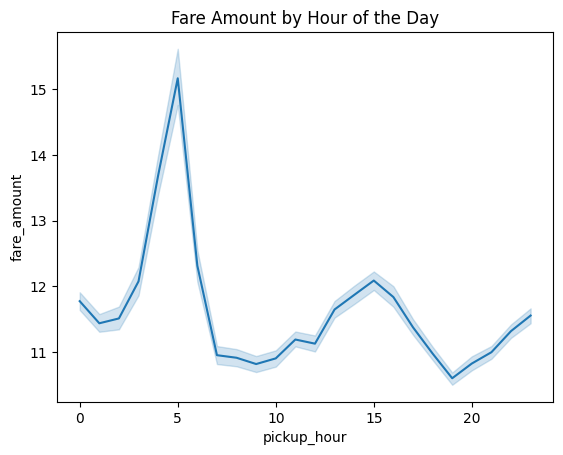

In [31]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
sns.lineplot(x='pickup_hour', y='fare_amount', data=data)
plt.title('Fare Amount by Hour of the Day')
plt.show()

### Fare Amount by Weekday:

Analyze how the fare amount varies by day of the week.

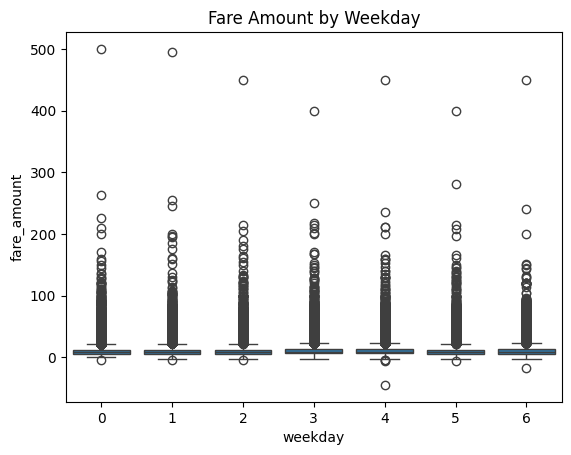

In [32]:
sns.boxplot(x='weekday', y='fare_amount', data=data)
plt.title('Fare Amount by Weekday')
plt.show()